## Multi-Class Prediction of Cirrhosis Outcomes

Since to 2023-12-20

### 1. **library imports**

In [1]:
# !pip install autogluon.eda

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import autogluon.eda.auto as auto
from autogluon.tabular import TabularDataset, TabularPredictor

### **2. data download**

In [4]:
!kaggle competitions download -c playground-series-s3e26
!unzip playground-series-s3e26 -d data

df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

!rm -rf data
!rm playground-series-s3e26.zip


  0%|          | 0.00/350k [00:00<?, ?B/s]
100%|##########| 350k/350k [00:00<00:00, 1.35MB/s]
100%|##########| 350k/350k [00:00<00:00, 1.33MB/s]


Archive:  playground-series-s3e26.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


### **3. EDA**

`-` First, let's check DataFrames.

The more information of data, please check this hyperlink; [Cirrhosis Patient Survival Prediction](https://www.kaggle.com/datasets/joebeachcapital/cirrhosis-patient-survival-prediction)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

In [18]:
set(df_train.columns) - set(df_test.columns)

{'Status'}

> No missing, and responsible value is a `Status`

In [21]:
df_train.Status.unique()  ## Three values in this column.

array(['D', 'C', 'CL'], dtype=object)

In [22]:
submission

,id,Status_C,Status_CL,Status_D
0,7905,0.628084,0.034788,0.337128
1,7906,0.628084,0.034788,0.337128
2,7907,0.628084,0.034788,0.337128
3,7908,0.628084,0.034788,0.337128
4,7909,0.628084,0.034788,0.337128
...,...,...,...,...
5266,13171,0.628084,0.034788,0.337128
5267,13172,0.628084,0.034788,0.337128
5268,13173,0.628084,0.034788,0.337128
5269,13174,0.628084,0.034788,0.337128


> And submission wanna probabilities for each status.

`-` `quick_fit`

Then, we're starting to EDA with `autogluon.eda`

## Target variable analysis

### Label Insights

 - Moderate minority class imbalance detected - imbalance ratio is `5.54%`. Recommendations:
   - downsample majority class `C` to improve the balance
   - upweight downsampled class so that `sample_weight = original_weight x downsampling_factor`.[TabularPredictor](https://auto.gluon.ai/stable/api/autogluon.predictor.html#module-0) supports this via `sample_weight` parameter

,count,unique,top,freq,dtypes,missing_count,missing_ratio,raw_type,special_types
Status,7905,3,C,4965,object,,,object,


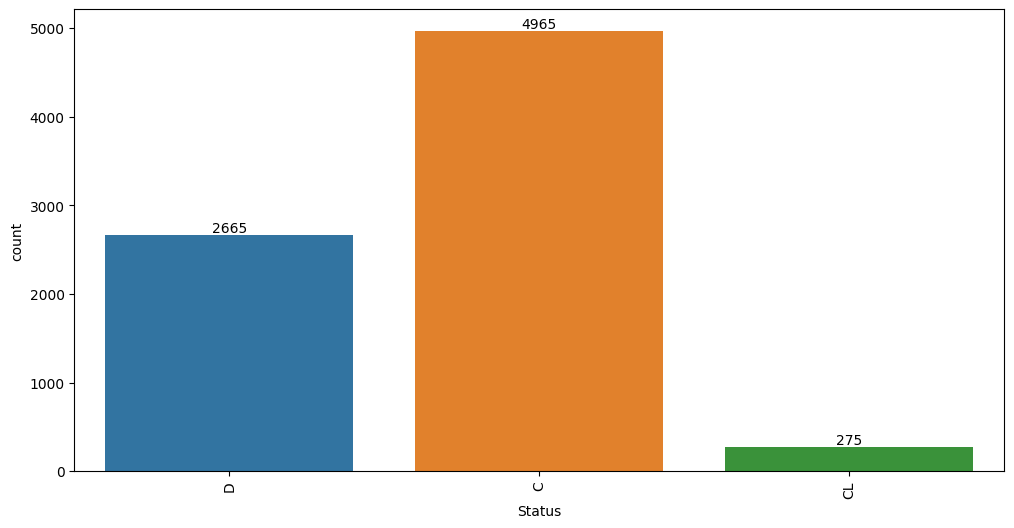

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `Status` >= `0.5`**

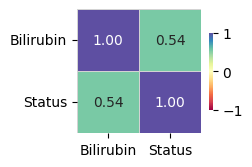

**Feature interaction between `Bilirubin`/`Status` in `train_data`**

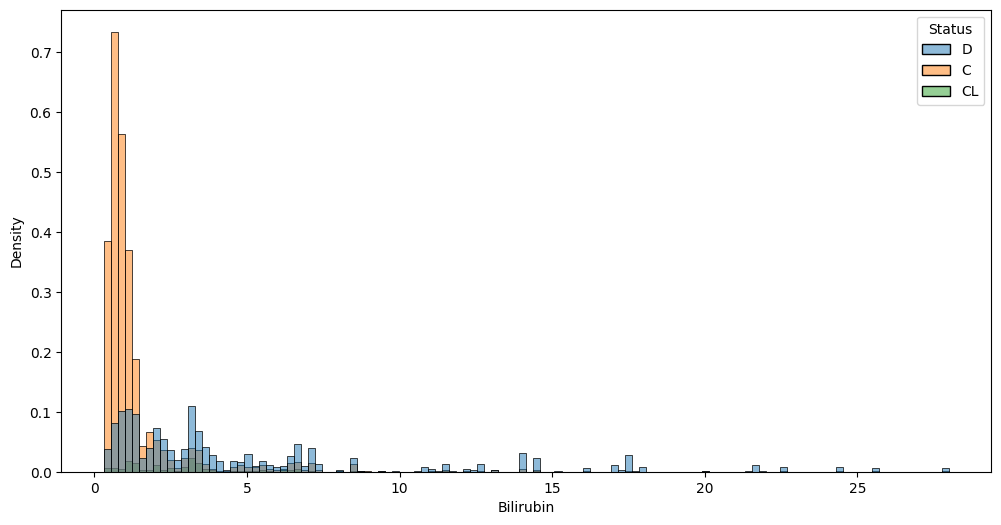

In [28]:
auto.target_analysis(
    train_data = df_train,
    label = 'Status',
    test_data = df_test,
    problem_type = 'multiclass'
)

No path specified. Models will be saved in: "AutogluonModels\ag-20231220_092031\"


### Model Prediction for Status

Using validation data for `Test` points

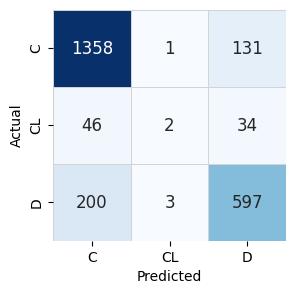

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,0.825042,0.833935,0.032909,0.011218,1.472305,0.032909,0.011218,1.472305,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
Bilirubin,0.029005,0.002881,0.000012,5,0.034937,0.023073
N_Days,0.019646,0.002162,0.000017,5,0.024098,0.015194
Prothrombin,0.013069,0.004422,0.001358,5,0.022173,0.003965
Copper,0.008685,0.002609,0.000870,5,0.014057,0.003313
Age,0.005818,0.002052,0.001586,5,0.010044,0.001592
Hepatomegaly,0.005481,0.001955,0.001652,5,0.009506,0.001456
Platelets,0.004384,0.001508,0.001445,5,0.007490,0.001279
Cholesterol,0.002614,0.002656,0.046311,5,0.008083,-0.002856
Edema,0.002445,0.001670,0.015349,5,0.005885,-0.000994
SGOT,0.001855,0.002626,0.094684,5,0.007262,-0.003552


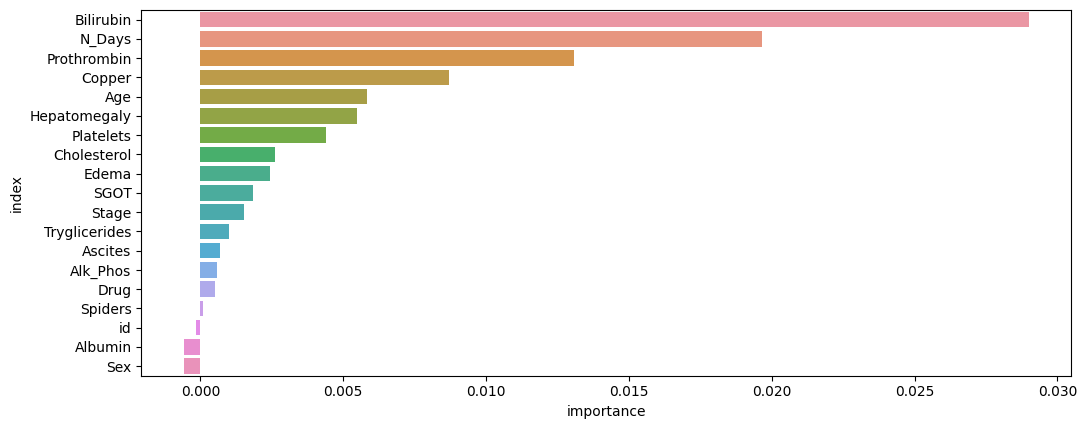

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,C,CL,D,error
430,430,1012,D-penicillamine,18731,F,N,Y,Y,S,8.0,...,288.00,133.0,238.0,12.0,4.0,CL,0.027901,0.005521,0.966578,0.961057
4935,4935,2475,Placebo,17884,F,Y,Y,Y,Y,3.2,...,102.30,62.0,248.0,11.5,4.0,CL,0.029484,0.010874,0.959642,0.948768
677,677,3388,Placebo,15548,F,N,N,N,N,0.8,...,97.65,114.0,265.0,10.0,4.0,CL,0.944454,0.007141,0.048405,0.937312
4203,4203,2241,Placebo,14705,F,N,N,N,N,0.5,...,54.25,145.0,265.0,11.0,1.0,CL,0.947356,0.018498,0.034146,0.928859
6426,6426,533,D-penicillamine,20232,F,N,Y,Y,Y,1.6,...,134.85,92.0,172.0,11.2,2.0,C,0.033946,0.004015,0.962039,0.928093
4531,4531,1525,D-penicillamine,14025,F,N,N,N,N,0.4,...,58.00,85.0,153.0,9.8,3.0,D,0.958991,0.009851,0.031158,0.927833
1791,1791,1237,Placebo,17884,F,N,N,N,N,1.0,...,72.85,224.0,344.0,9.7,2.0,CL,0.936153,0.013925,0.049922,0.922227
1004,1004,2216,Placebo,19295,F,Y,Y,N,Y,12.7,...,51.15,99.0,200.0,11.0,4.0,C,0.034836,0.008199,0.956965,0.922129
5669,5669,1536,Placebo,14161,F,N,N,N,N,0.7,...,88.35,130.0,445.0,9.6,3.0,D,0.946618,0.027860,0.025523,0.921095
2971,2971,2170,D-penicillamine,17512,F,N,N,N,N,1.0,...,83.70,114.0,438.0,9.8,3.0,D,0.952360,0.011572,0.036067,0.916293


### Rows with the least distance vs other class

Rows in this category are the closest to the decision boundary vs the other class and are good candidates for additional labeling

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,C,CL,D,error
676,676,1783,D-penicillamine,17525,F,N,Y,Y,N,1.3,...,153.45,133.0,195.0,10.6,4.0,C,0.491289,0.017155,0.491555,0.000266
3668,3668,1882,Placebo,19246,M,N,Y,N,N,1.4,...,71.00,91.0,228.0,11.0,4.0,D,0.486783,0.027889,0.485328,0.001455
5912,5912,877,D-penicillamine,12979,F,N,Y,N,N,2.4,...,137.95,87.0,306.0,10.6,4.0,D,0.218636,0.392385,0.388980,0.003405
1546,1546,3297,D-penicillamine,22574,F,N,Y,N,N,2.3,...,110.05,52.0,240.0,11.0,3.0,D,0.497049,0.010963,0.491988,0.005061
822,822,1979,D-penicillamine,23235,M,N,Y,Y,N,0.8,...,133.30,93.0,339.0,11.0,4.0,C,0.491311,0.012139,0.496550,0.005239
3998,3998,3762,Placebo,19619,F,N,Y,Y,N,1.4,...,79.05,79.0,251.0,12.0,4.0,D,0.497469,0.010352,0.492179,0.005290
3934,3934,2556,Placebo,18719,F,N,Y,Y,N,1.8,...,196.85,106.0,79.0,10.3,4.0,C,0.486500,0.019139,0.494361,0.007861
5344,5344,552,Placebo,19318,F,N,Y,N,N,0.3,...,120.90,151.0,153.0,10.0,4.0,C,0.483127,0.024603,0.492269,0.009142
1746,1746,733,D-penicillamine,14939,F,N,N,N,N,2.0,...,130.20,210.0,539.0,10.6,3.0,CL,0.221139,0.380290,0.398572,0.018282
3546,3546,797,Placebo,16718,F,N,Y,Y,N,1.1,...,122.45,104.0,234.0,10.2,4.0,C,0.456253,0.067363,0.476385,0.020132


In [26]:
auto.quick_fit(
    train_data = df_train,
    label = 'Status',
    test_data = df_test,
    problem_type = 'multiclass',
    show_feature_importance_barplots = True
)

### **3. Just, Fitting**

In [ ]:
predictr = TabularPredictor(label = 'Status', problem_type = 'multiclass')

predictr.fit(df_train)

In [29]:
TabularPredictor?

Init signature:
TabularPredictor(
    label,
    problem_type=None,
    eval_metric=None,
    path=None,
    verbosity=2,
    log_to_file=False,
    log_file_path='auto',
    sample_weight=None,
    weight_evaluation=False,
    groups=None,
    **kwargs,
)
Docstring:     
AutoGluon TabularPredictor predicts values in a column of a tabular dataset (classification or regression).

Parameters
----------
label : str
    Name of the column that contains the target variable to predict.
problem_type : str, default = None
    Type of prediction problem, i.e. is this a binary/multiclass classification or regression problem (options: 'binary', 'multiclass', 'regression', 'quantile').
    If `problem_type = None`, the prediction problem type is inferred based on the label-values in provided dataset.
eval_metric : function or str, default = None
    Metric by which predictions will be ultimately evaluated on test data.
    AutoGluon tunes factors such as hyperparameters, early-stopping, ensemble-w